bias =  -0.01782870707187012
rmse =  0.3128022880784117


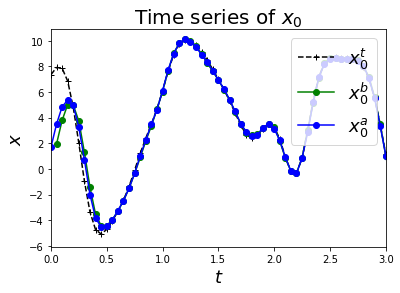

bias =  0.016530933068291214
rmse =  0.2747668814151274


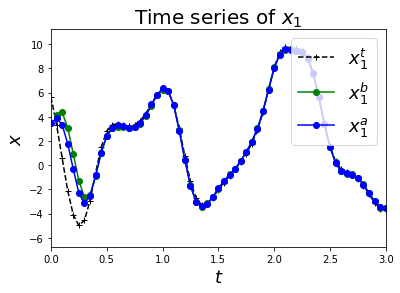

bias =  0.04746769756568337
rmse =  0.3578172102911575


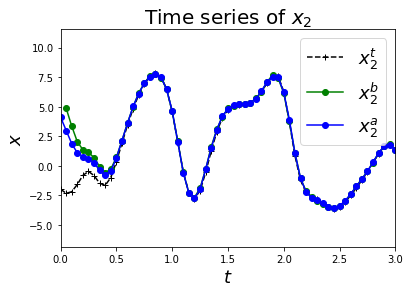

bias =  -0.0014593109317773932
rmse =  0.13273348224514253


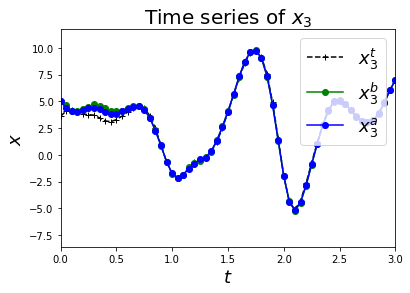

bias =  -0.016284137727115032
rmse =  0.19390606160390217


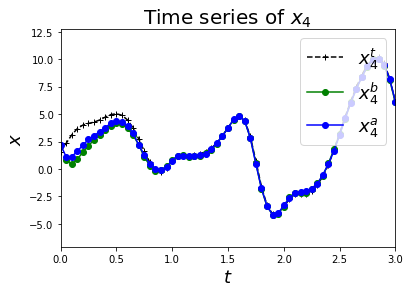

bias =  -0.0004696149512349481
rmse =  0.17152976187638144


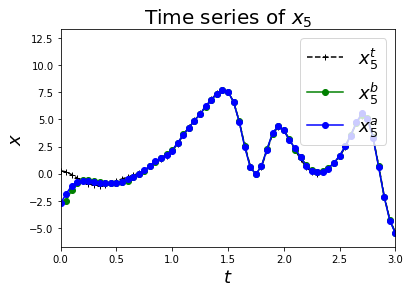

bias =  0.010366568300178574
rmse =  0.14914115872565792


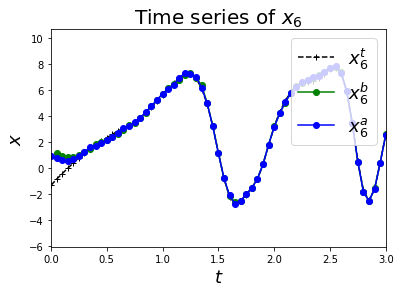

bias =  -0.01328410496009568
rmse =  0.11160425349528753


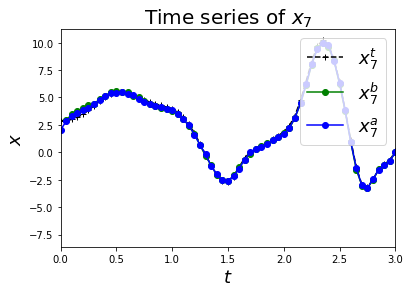

bias =  0.024162801581017423
rmse =  0.22746135439647416


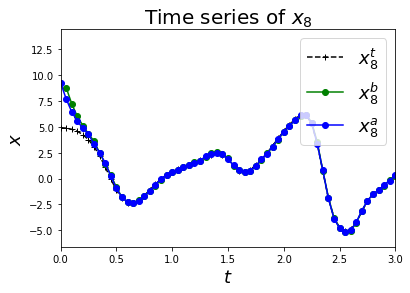

bias =  0.003221213138891247
rmse =  0.11990852537644035


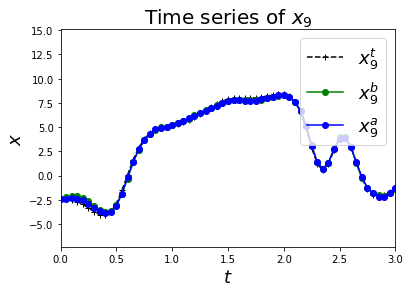

bias =  0.022095238377685424
rmse =  0.20965801475231047


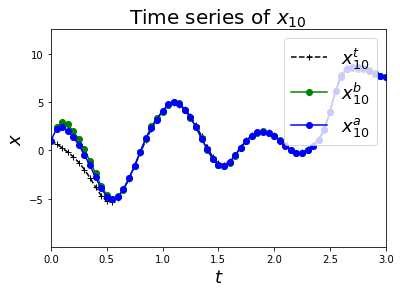

bias =  -0.04217073803396425
rmse =  0.5662777384212259


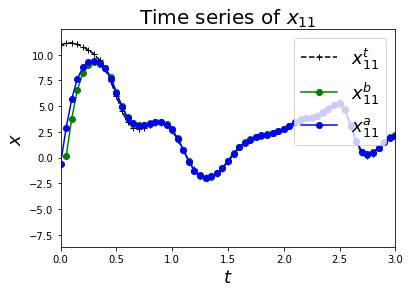

bias =  -0.013309743145588518
rmse =  0.2413185515442434


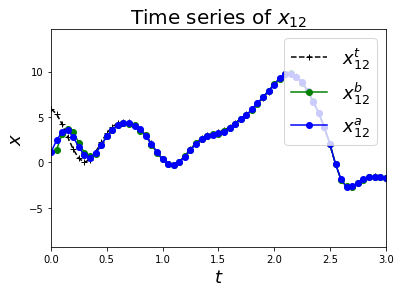

bias =  0.03721968651320261
rmse =  0.43985197374544033


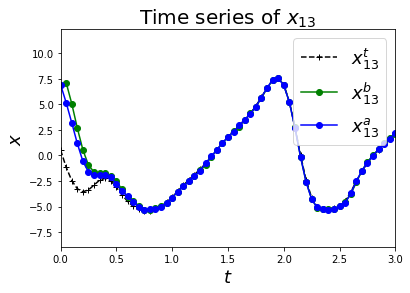

bias =  0.0020792307629742468
rmse =  0.18892934208635112


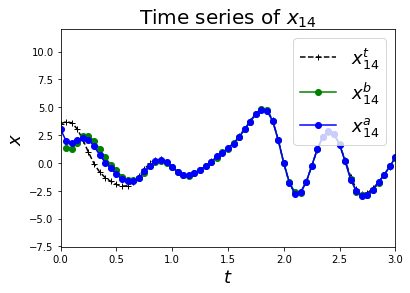

bias =  -0.056299775141457425
rmse =  0.6194521745154208


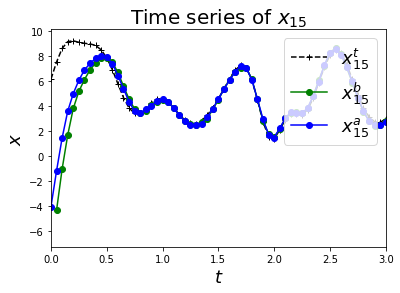

bias =  -0.016473844715551852
rmse =  0.44128972607248207


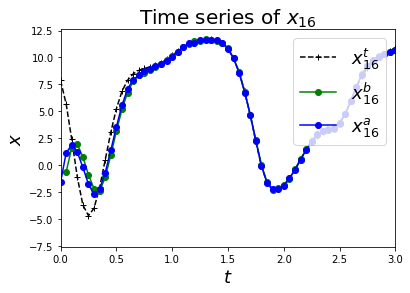

bias =  0.007203247258762842
rmse =  0.2445966195064292


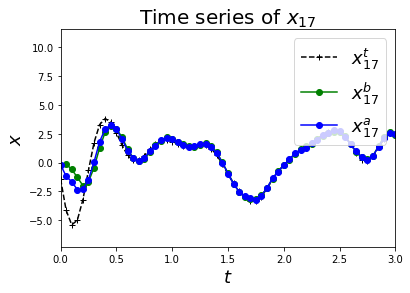

bias =  0.005265919257417553
rmse =  0.24383076584755797


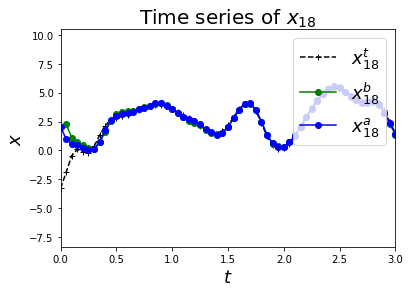

bias =  0.040592063453996186
rmse =  0.3923605852722022


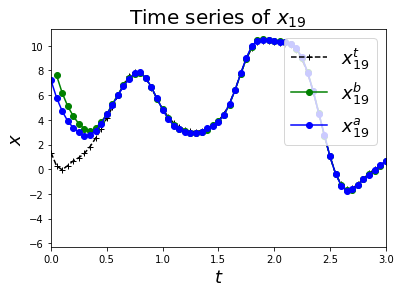

bias =  -0.025860511684892624
rmse =  0.27743231923752204


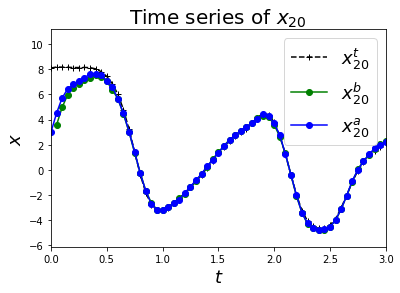

bias =  0.006161240683603878
rmse =  0.2166424792942863


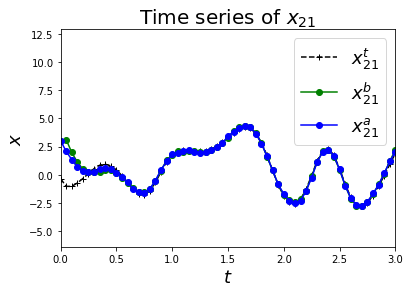

bias =  0.033951289061131755
rmse =  0.4221336258711838


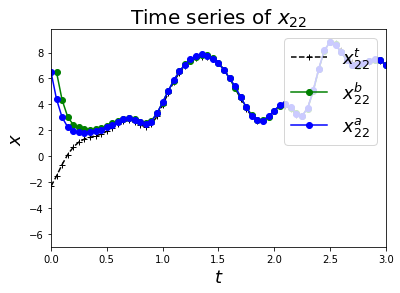

bias =  0.02058378018561606
rmse =  0.20467232019660722


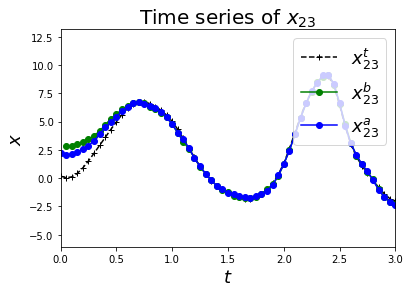

bias =  0.003177902371573729
rmse =  0.12603646174332334


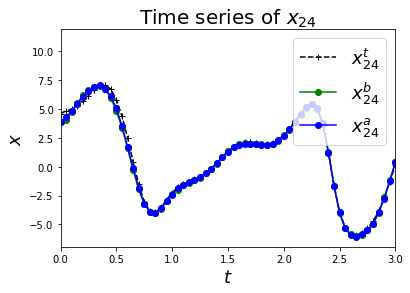

bias =  -0.02115635613165846
rmse =  0.2278859965547402


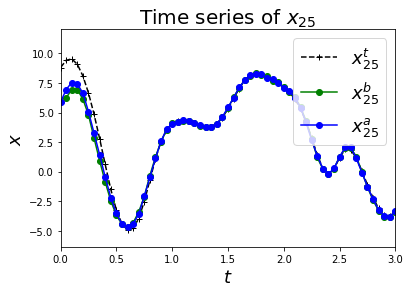

bias =  0.022234357211115073
rmse =  0.13202515183326852


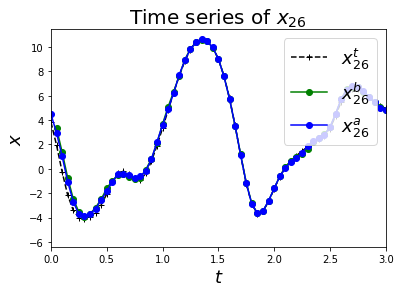

bias =  -0.007853773303459717
rmse =  0.138660419542639


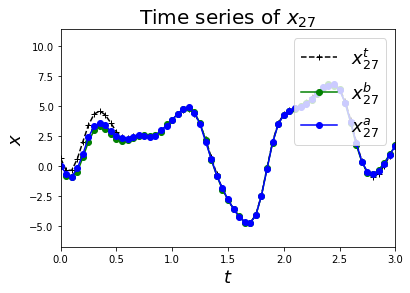

bias =  -0.0007572685956298325
rmse =  0.10455111834062869


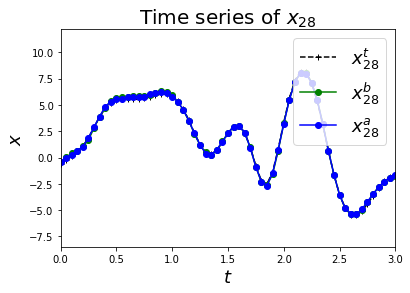

bias =  0.0361166694797305
rmse =  0.3039644592709709


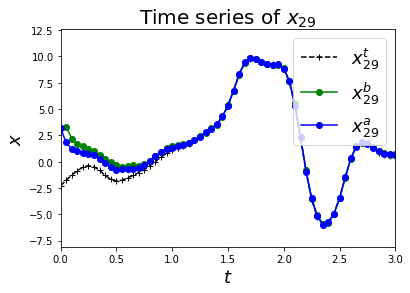

bias =  0.0605093282947588
rmse =  0.5654154203974187


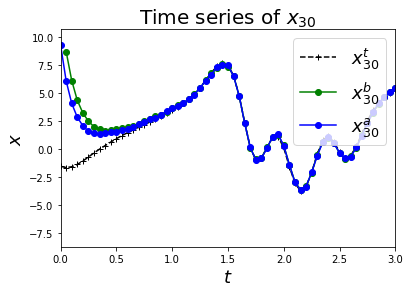

bias =  -0.04531657184405457
rmse =  0.4597955460859071


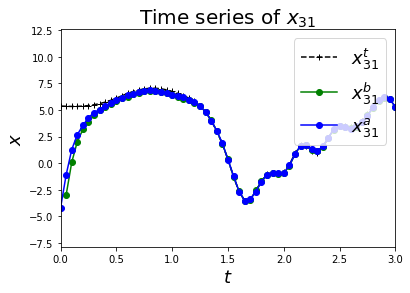

bias =  0.014839530076840536
rmse =  0.26455191424499974


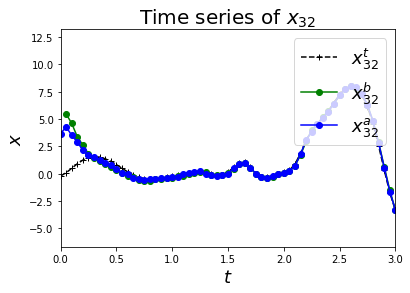

bias =  0.021423258124852684
rmse =  0.14106595474594488


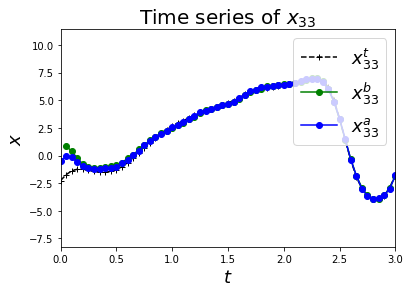

bias =  0.034360820497218815
rmse =  0.2619370117085816


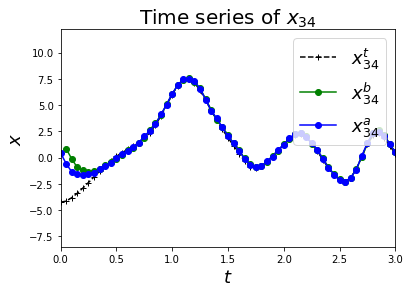

bias =  0.03328362507394121
rmse =  0.3359468556739115


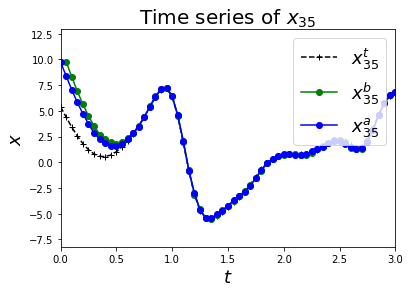

bias =  -0.014937860758093302
rmse =  0.16496926790630362


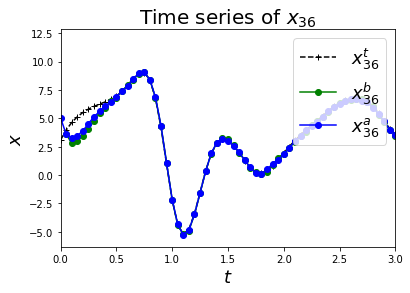

bias =  -0.01873553606937723
rmse =  0.17705803815633803


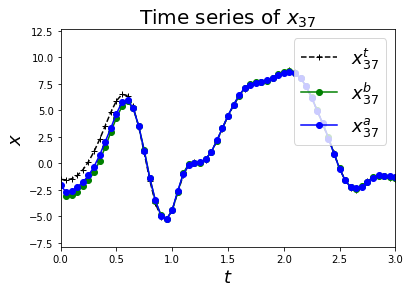

bias =  0.010871840262153088
rmse =  0.11309830086124274


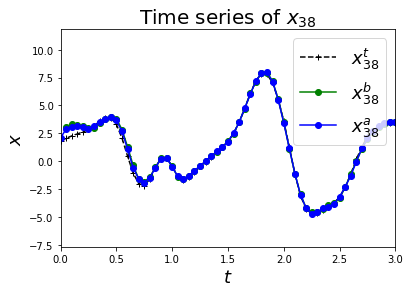

bias =  -0.022995326991363182
rmse =  0.2845276543472271


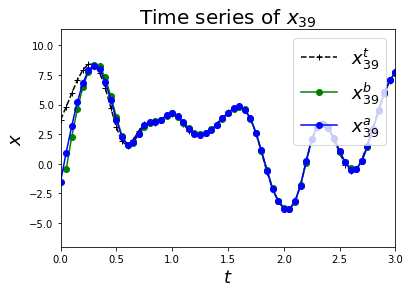

In [68]:
"""
Plot the data assimilation results
Read:
  x_t.txt
  x_b.txt
  x_a.txt
"""
import numpy as np
from settings import *
import matplotlib.pyplot as plt
N = 40

# load data
x_t_save = np.genfromtxt('x_t.txt')
x_b_save = np.genfromtxt('x_b.txt')
x_a_save = np.genfromtxt('x_a.txt')

# Plot time series of a single grid point
bias_v = []
rmse_v = []

for i in range(N):
    pt = i
    plt.figure()
    #print(x_a_save[:,pt-1])
    #print(x_b_save[:,pt-1])
    
    plt.plot(np.arange(nT+1) * dT, x_t_save[:,pt-1], 'k+--', label=r'$x^t_{' + str(pt) + '}$')
    plt.plot(np.arange(nT+1) * dT, x_b_save[:,pt-1], 'go-' , label=r'$x^b_{' + str(pt) + '}$')
    plt.plot(np.arange(nT+1) * dT, x_a_save[:,pt-1], 'bo-' , label=r'$x^a_{' + str(pt) + '}$')
    bias_i = (x_a_save[:,pt-1]-x_t_save[:,pt-1]).mean()
    print("bias = ", bias_i)
    rmse_i = np.std(x_a_save[:,pt-1]-x_t_save[:,pt-1])
    print("rmse = ", rmse_i)
    bias_v.append(bias_i)
    rmse_v.append(rmse_i)
    
    
    plt.xlabel(r'$t$', size=18)
    plt.ylabel(r'$x$', size=18)
    plt.xlim(0,3)
    plt.title(r'Time series of $x_{' + str(pt) + '}$', size=20)
    plt.legend(loc='upper right', numpoints=1, prop={'size':18})
    #plt.savefig('timeseries.png', dpi=200)
    plt.show()
    plt.close()


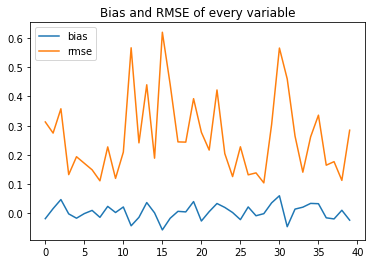

In [69]:
#per variable
#print(bias)
#print(rmse)
plt.plot(np.arange(N),bias_v, label="bias")
plt.plot(np.arange(N),rmse_v, label="rmse")
plt.legend(loc="upper left")
plt.title("Bias and RMSE of every variable")
plt.show()

In [70]:
analysis_error = x_a_save-x_t_save
bias_t = []
rmse_t = []
for i in range(nT):
    
    bias_i = analysis_error[i][:].mean()
    rmse_i = np.std(analysis_error[i][:])
    bias_t = np.append(bias_t, bias_i)
    rmse_t = np.append(rmse_t, rmse_i)

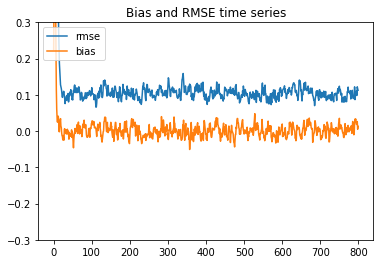

In [71]:
plt.plot(rmse_t, label ="rmse" )
plt.plot(bias_t, label = "bias")
plt.ylim(-0.3,0.3)
plt.legend(loc="upper left")
plt.title("Bias and RMSE time series")
plt.show()

In [72]:
rmse = rmse_t.mean()
bias = bias_t.mean()
print(rmse)

0.1297762841255139
